In [1]:
import pandas as pd
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV

In [2]:
# Load Data
df = pd.read_csv("synthetic_food_dataset_imbalanced.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (31700, 16)


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [3]:
# Info
print("\n🔹 Dataset Info:")
print(df.info())

# Missing values
print("\n🔹 Missing Values per Column:")
print(df.isnull().sum())

# Duplicates
print("\n🔹 Duplicate Rows:", df.duplicated().sum())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  

In [4]:
# Describe numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,31325.0,273.378441,111.457160,60.786204,210.301731,281.774249,329.821946,1289.956763
Protein,31325.0,9.523802,8.024212,0.000000,3.858307,9.091637,12.683957,81.761772
Fat,31325.0,12.476848,8.425834,0.000000,8.245636,11.574161,15.818611,88.619611
Carbs,31325.0,28.943200,12.668795,0.000000,25.098800,29.681430,34.635789,140.585537
Sugar,31325.0,8.543813,7.989075,0.000000,3.739656,5.500479,14.426303,78.548162
Fiber,31325.0,1.904044,1.779542,0.000000,0.741204,1.646608,2.668750,18.891993
Sodium,31325.0,335.387611,319.066106,0.000000,63.000654,292.525242,631.367901,2724.236846
Cholesterol,31325.0,26.865167,24.965067,0.000000,12.701920,23.285882,35.132214,260.149443
Glycemic_Index,31325.0,64.213509,25.390239,0.000000,59.984731,68.436204,75.464697,286.126400
Water_Content,31325.0,48.976592,20.738749,13.465039,38.994221,45.613748,52.399496,251.837472


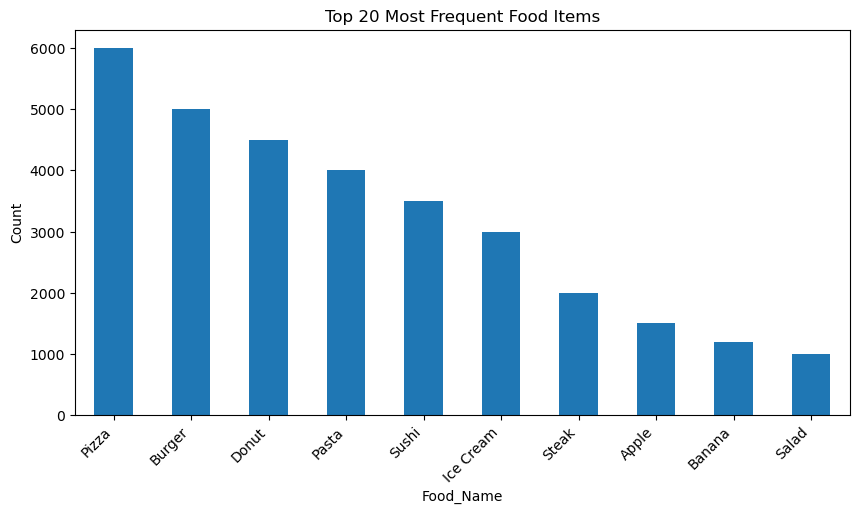

In [5]:
plt.figure(figsize=(10,5))
df['Food_Name'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Most Frequent Food Items")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

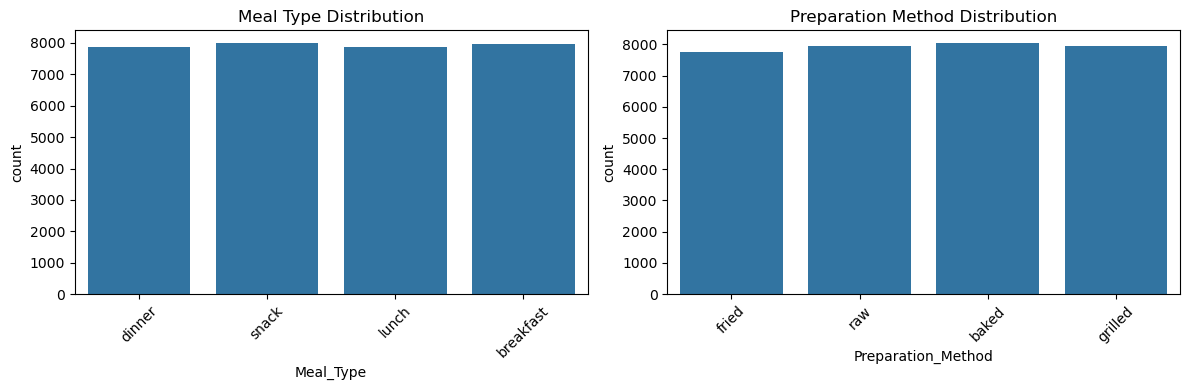

In [6]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data=df, x="Meal_Type")
plt.title("Meal Type Distribution")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(data=df, x="Preparation_Method")
plt.title("Preparation Method Distribution")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

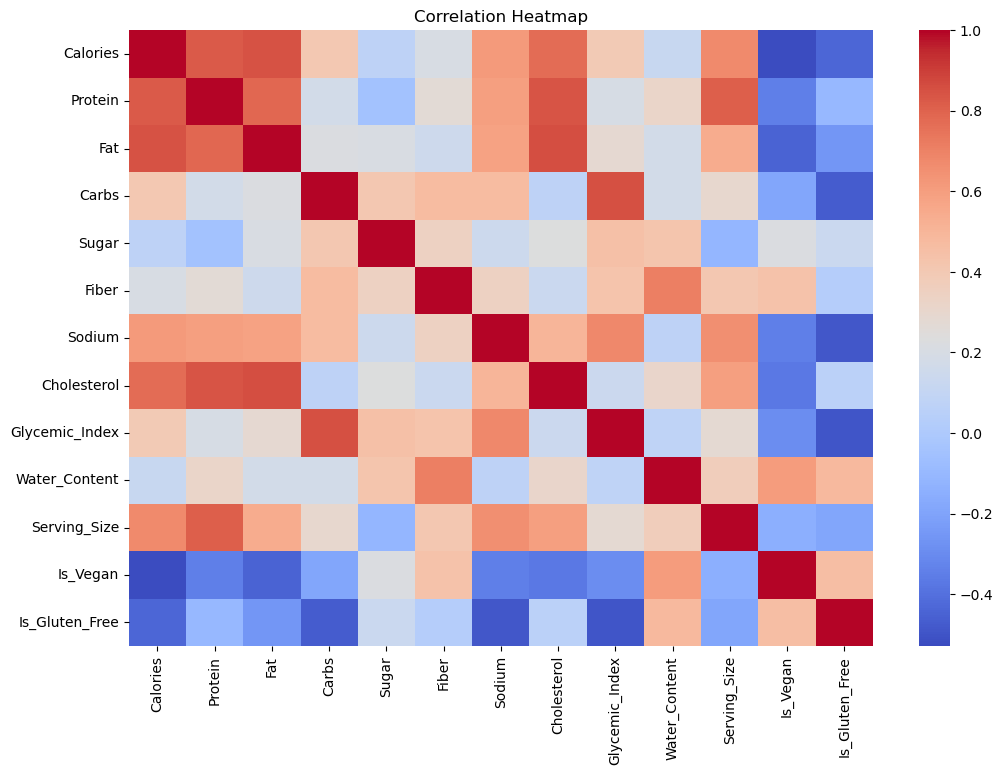

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\arjun\AppData\Local\Temp\ipykernel_4288\3358484888.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set2")


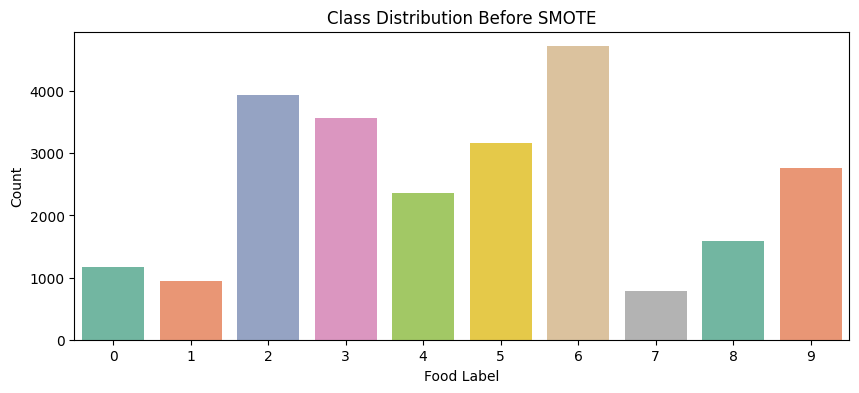

C:\Users\arjun\AppData\Local\Temp\ipykernel_4288\3358484888.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette="Set1")


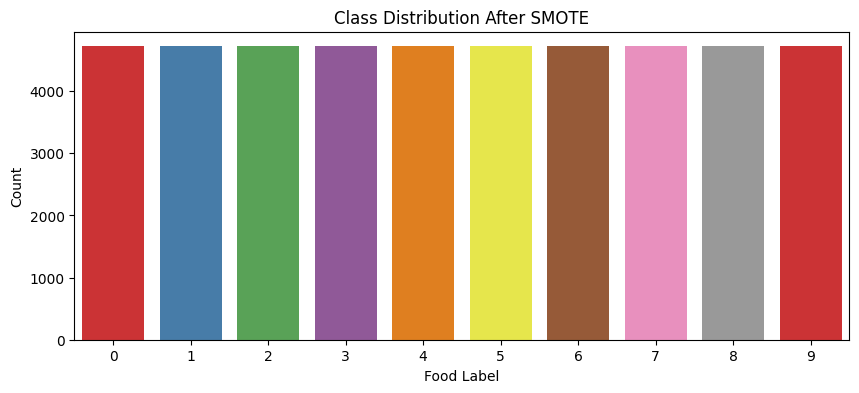

['Models/label_encoder.pkl']

In [3]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df['Is_Vegan'] = df['Is_Vegan'].astype(int)
df['Is_Gluten_Free'] = df['Is_Gluten_Free'].astype(int)

df = pd.get_dummies(df, columns=['Meal_Type', 'Preparation_Method'], drop_first=True)

# Encode target
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Food_Name'])

X = df.drop(['Food_Name', 'Label'], axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(10,4))
sns.countplot(x=y_train, palette="Set2")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Food Label")
plt.ylabel("Count")
plt.show()

# Balance class with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

plt.figure(figsize=(10,4))
sns.countplot(x=y_train_res, palette="Set1")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Food Label")
plt.ylabel("Count")
plt.show()

# PCA
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test_scaled)

# Save preprocessors
os.makedirs("Models", exist_ok=True)

joblib.dump(scaler, "Models/scaler.pkl")
joblib.dump(pca, "Models/pca.pkl")
joblib.dump(le, "Models/label_encoder.pkl")

In [4]:
def train_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test, model_name):
    # ✅ Wrap ALL classifiers with calibration (except Logistic Regression which is already calibrated)
    if not isinstance(model, (RandomForestClassifier, DecisionTreeClassifier)):
        model = CalibratedClassifierCV(model, cv=5, method="sigmoid")

    # ✅ Special case: Decision Tree & Random Forest → wrap inside calibration *after tuning*
    if isinstance(model, DecisionTreeClassifier):
        base_model = DecisionTreeClassifier(random_state=42)
        if param_grid:
            search = RandomizedSearchCV(
                base_model, param_grid, cv=3, scoring="accuracy",
                n_iter=min(5, len(param_grid)), random_state=42, n_jobs=-1
            )
            search.fit(X_train, y_train)
            best_model = CalibratedClassifierCV(search.best_estimator_, cv=5, method="isotonic")
            best_model.fit(X_train, y_train)   # ✅ FIX: fit calibration
        else:
            best_model = CalibratedClassifierCV(base_model, cv=5, method="isotonic")
            best_model.fit(X_train, y_train)

    elif isinstance(model, RandomForestClassifier):
        base_model = RandomForestClassifier(random_state=42)
        if param_grid:
            search = RandomizedSearchCV(
                base_model, param_grid, cv=3, scoring="accuracy",
                n_iter=min(5, len(param_grid)), random_state=42, n_jobs=-1
            )
            search.fit(X_train, y_train)
            best_model = CalibratedClassifierCV(search.best_estimator_, cv=5, method="sigmoid")
            best_model.fit(X_train, y_train)   # ✅ FIX: fit calibration
        else:
            best_model = CalibratedClassifierCV(base_model, cv=5, method="sigmoid")
            best_model.fit(X_train, y_train)

    else:
        # ✅ Other models: tune directly
        if param_grid:
            search = RandomizedSearchCV(
                model, param_grid, cv=3, scoring="accuracy",
                n_iter=min(5, len(param_grid)), random_state=42, n_jobs=-1
            )
            search.fit(X_train, y_train)
            best_model = search.best_estimator_
        else:
            best_model = model.fit(X_train, y_train)

    # ✅ Predictions
    y_pred = best_model.predict(X_test)
    
    # ✅ Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    # ✅ Print results
    print(f"🔹 {model_name} Performance:")
    print(f"   Accuracy : {acc:.4f}")
    print(f"   Precision: {prec:.4f}")
    print(f"   Recall   : {rec:.4f}")
    print(f"   F1 Score : {f1:.4f}")
    print("-"*50)

    # ✅ Save calibrated model
    model_path = f"Models/{model_name.replace(' ', '_').lower()}.pkl"
    joblib.dump(best_model, model_path)

    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

In [5]:
logistic_results = train_and_evaluate(
    LogisticRegression(max_iter=10000, class_weight="balanced", random_state=42),
    {"estimator__C": [0.01, 0.1, 1, 10]},
    X_train_pca, y_train_res,
    X_test_pca, y_test,
    "Logistic Regression"
)

🔹 Logistic Regression Performance:
   Accuracy : 0.9754
   Precision: 0.9761
   Recall   : 0.9754
   F1 Score : 0.9753
--------------------------------------------------


In [6]:
tree_results = train_and_evaluate(
    DecisionTreeClassifier(random_state=42),
    {"max_depth": [3, 5, 10, None], 
     "min_samples_split": [2, 5, 10],
     "min_samples_leaf": [2, 5, 10]},
    X_train_pca, y_train_res, X_test_pca, y_test,
    "Decision Tree"
)

🔹 Decision Tree Performance:
   Accuracy : 0.9829
   Precision: 0.9829
   Recall   : 0.9829
   F1 Score : 0.9829
--------------------------------------------------


In [7]:
rf_results = train_and_evaluate(
    RandomForestClassifier(class_weight="balanced", random_state=42),
    {"n_estimators": [50, 100], "max_depth": [10, 20, None]},
    X_train_pca, y_train_res, X_test_pca, y_test,
    "Random Forest"
)

🔹 Random Forest Performance:
   Accuracy : 0.9843
   Precision: 0.9843
   Recall   : 0.9843
   F1 Score : 0.9843
--------------------------------------------------


In [8]:
knn_results = train_and_evaluate(
    KNeighborsClassifier(),
    {"estimator__n_neighbors": [3, 5, 7]},
    X_train_pca, y_train_res, X_test_pca, y_test,
    "K-Nearest Neighbors"
)

🔹 K-Nearest Neighbors Performance:
   Accuracy : 0.9851
   Precision: 0.9852
   Recall   : 0.9851
   F1 Score : 0.9851
--------------------------------------------------


In [9]:
svm_results = train_and_evaluate(
    SVC(class_weight="balanced", random_state=42),
    {"estimator__C": [0.1, 1, 10], "estimator__kernel": ["linear", "rbf"]},
    X_train_pca, y_train_res, X_test_pca, y_test,
    "Support Vector Machine"
)

🔹 Support Vector Machine Performance:
   Accuracy : 0.9870
   Precision: 0.9872
   Recall   : 0.9870
   F1 Score : 0.9871
--------------------------------------------------


In [10]:
xgb_results = train_and_evaluate(
    XGBClassifier(eval_metric='mlogloss', random_state=42, use_label_encoder=False),
    {"estimator__n_estimators": [50, 100], "estimator__learning_rate": [0.01, 0.1, 0.2]},
    X_train_pca, y_train_res, X_test_pca, y_test,
    "XGBoost"
)

C:\Users\arjun\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [09:58:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arjun\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [09:58:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arjun\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [09:58:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arjun\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [09:58:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

🔹 XGBoost Performance:
   Accuracy : 0.9806
   Precision: 0.9807
   Recall   : 0.9806
   F1 Score : 0.9807
--------------------------------------------------


In [11]:
results_df = pd.DataFrame([
    logistic_results, tree_results, rf_results,
    knn_results, svm_results, xgb_results
])

display(results_df)

# Save results to CSV
results_df.to_csv("model_results.csv", index=False)
print("Model results saved to model_results.csv")

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.975368,0.976138,0.975368,0.975272
1,Decision Tree,0.982885,0.982923,0.982885,0.982894
2,Random Forest,0.984325,0.984350,0.984325,0.984331
3,K-Nearest Neighbors,0.985125,0.985162,0.985125,0.985132
4,Support Vector Machine,0.987044,0.987175,0.987044,0.987079
5,XGBoost,0.980646,0.980713,0.980646,0.980660


Model results saved to model_results.csv
